In [1]:
import pandas as pd
from scipy.stats import chisquare

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
gnomad = pd.read_csv("../output/gnomAD_residue_transition_count.csv", index_col = 0)
gnomad

,orig,var,count,paths,exp_freq,exp,obs/exp
0,A,T,254,4,0.166667,130.500000,1.946360
1,A,S,112,4,0.166667,130.500000,0.858238
2,A,P,52,4,0.166667,130.500000,0.398467
3,A,D,44,2,0.083333,65.250000,0.674330
4,A,V,226,4,0.166667,130.500000,1.731801
...,...,...,...,...,...,...,...
1,Y,D,8,2,0.166667,34.333333,0.233010
2,Y,H,46,2,0.166667,34.333333,1.339806
3,Y,F,13,2,0.166667,34.333333,0.378641
4,Y,C,107,2,0.166667,34.333333,3.116505


In [3]:
# Step 1: Group by 'orig' and sum the 'count'
sum_counts = gnomad.groupby('orig')['count'].transform('sum')

# # Step 2: Divide each 'count' by the sum of 'count' for its respective 'orig'
gnomad['gnomad_exp'] = gnomad['count'] / sum_counts

# print(df)
gnomad = gnomad[["orig", "var", "gnomad_exp"]]
gnomad

,orig,var,gnomad_exp
0,A,T,0.324393
1,A,S,0.143040
2,A,P,0.066411
3,A,D,0.056194
4,A,V,0.288633
...,...,...,...
1,Y,D,0.038835
2,Y,H,0.223301
3,Y,F,0.063107
4,Y,C,0.519417


In [4]:
pt_var = pd.read_csv("../output/patient_variant_residue_transition_count.csv", index_col = 0)
pt_var = pt_var[["orig", "var", "count"]]
pt_var

,orig,var,count
0,A,T,101.0
1,A,S,38.0
2,A,P,21.0
3,A,D,9.0
4,A,V,70.0
...,...,...,...
1,Y,D,1.0
2,Y,H,12.0
3,Y,F,5.0
4,Y,C,29.0


In [5]:
residue_transition_summary = pd.merge(pt_var, gnomad)
residue_transition_summary

,orig,var,count,gnomad_exp
0,A,T,101.0,0.324393
1,A,S,38.0,0.143040
2,A,P,21.0,0.066411
3,A,D,9.0,0.056194
4,A,V,70.0,0.288633
...,...,...,...,...
145,Y,D,1.0,0.038835
146,Y,H,12.0,0.223301
147,Y,F,5.0,0.063107
148,Y,C,29.0,0.519417


In [6]:
def return_obs_transition_freq(residue):
    orig_resid = residue_transition_summary[residue_transition_summary["orig"] == residue]

    return_df = orig_resid#.rename(columns = {"count"})
    
    #return_df = pd.merge(return_df, expec, how = "right")

    return_df = return_df.fillna(0)
    return_df["exp"] = return_df["gnomad_exp"] * sum(return_df["count"])

    #display(return_df)


        
    p_val = chisquare(f_obs=return_df["count"], f_exp=return_df["exp"]).pvalue
    print(p_val)
    
    return_df["obs/exp"] = return_df["count"] / return_df["exp"]
    display(return_df[["orig", "var", "count", "exp", "obs/exp"]])


    return p_val, return_df

In [7]:
aa_codes = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

p_vals = []
results_df = []

for aa in aa_codes:
    print(aa)
    output = return_obs_transition_freq(aa)
    p_vals.append(output[0])
    results_df.append(output[1])

A
0.19952948437341345


,orig,var,count,exp,obs/exp
0,A,T,101.0,85.639847,1.179358
1,A,S,38.0,37.762452,1.006291
2,A,P,21.0,17.532567,1.197771
3,A,D,9.0,14.835249,0.606663
4,A,V,70.0,76.199234,0.918644
5,A,G,22.0,25.624521,0.858553
6,A,E,3.0,6.406130,0.468301


C
0.1868277325667889


,orig,var,count,exp,obs/exp
7,C,S,10.0,5.465347,1.829710
8,C,G,1.0,3.089109,0.323718
9,C,R,2.0,4.039604,0.495098
10,C,Y,9.0,7.603960,1.183594
11,C,F,1.0,2.613861,0.382576
12,C,W,1.0,1.188119,0.841667


D
0.0922429114658521


,orig,var,count,exp,obs/exp
13,D,N,46.0,45.545455,1.009980
14,D,Y,12.0,16.531313,0.725895
15,D,H,17.0,16.868687,1.007784
16,D,V,10.0,15.181818,0.658683
17,D,G,36.0,30.701010,1.172600
18,D,A,2.0,7.759596,0.257745
19,D,E,44.0,34.412121,1.278619


E
0.44227801581838466


,orig,var,count,exp,obs/exp
20,E,K,59.0,57.366412,1.028476
21,E,Q,17.0,21.671756,0.784431
22,E,V,14.0,9.561069,1.464271
23,E,G,23.0,28.683206,0.801863
24,E,A,13.0,10.835878,1.199718
25,E,D,41.0,38.881679,1.054481


F
0.9365005570000785


,orig,var,count,exp,obs/exp
26,F,I,3.0,2.228571,1.346154
27,F,V,1.0,1.485714,0.673077
28,F,L,12.0,12.814286,0.936455
29,F,Y,2.0,1.300000,1.538462
30,F,C,4.0,3.157143,1.266968
31,F,S,4.0,5.014286,0.797721


G
0.013660847884923232


,orig,var,count,exp,obs/exp
32,G,R,64.0,57.032767,1.122162
33,G,E,20.0,26.030340,0.768334
34,G,V,24.0,33.342233,0.719808
35,G,A,24.0,23.983010,1.000708
36,G,S,62.0,42.116505,1.472107
37,G,C,16.0,15.501214,1.032177
38,G,D,28.0,38.314320,0.730797
39,G,W,3.0,4.679612,0.641079


H
0.6045266276459673


,orig,var,count,exp,obs/exp
40,H,N,8.0,7.87500,1.015873
41,H,Y,24.0,23.62500,1.015873
42,H,D,3.0,3.93750,0.761905
43,H,L,2.0,6.46875,0.309179
44,H,R,25.0,25.31250,0.987654
45,H,P,8.0,6.75000,1.185185
46,H,Q,20.0,16.03125,1.247563


I
0.4211803810424046


,orig,var,count,exp,obs/exp
47,I,L,11.0,7.559880,1.455050
48,I,V,39.0,36.589820,1.065870
49,I,K,3.0,1.209581,2.480198
50,I,R,0.0,0.907186,0.000000
51,I,T,22.0,25.401198,0.866101
52,I,M,10.0,14.212575,0.703602
53,I,F,8.0,5.745509,1.392392
54,I,N,5.0,5.443114,0.918592
55,I,S,3.0,3.931138,0.763138


K
0.16064703119695875


,orig,var,count,exp,obs/exp
56,K,E,12.0,9.937143,1.207591
57,K,Q,5.0,2.748571,1.819127
58,K,I,0.0,0.211429,0.000000
59,K,R,13.0,14.165714,0.917709
60,K,T,2.0,2.537143,0.788288
61,K,N,2.0,6.342857,0.315315
62,K,M,3.0,1.057143,2.837838


L
0.7861421072176598


,orig,var,count,exp,obs/exp
63,L,M,11.0,9.358974,1.175342
64,L,V,34.0,31.820513,1.068493
65,L,W,4.0,2.673993,1.495890
66,L,S,8.0,8.021978,0.997260
67,L,F,37.0,34.227106,1.081015
68,L,I,13.0,10.695971,1.215411
69,L,H,5.0,3.743590,1.335616
70,L,R,11.0,13.102564,0.839530
71,L,P,19.0,28.076923,0.676712
72,L,Q,4.0,4.278388,0.934932


M
0.7639471427470167


,orig,var,count,exp,obs/exp
73,M,L,21.0,18.272727,1.149254
74,M,V,40.0,37.898990,1.055437
75,M,K,4.0,6.767677,0.591045
76,M,R,5.0,5.414141,0.923507
77,M,T,24.0,28.424242,0.844350
78,M,I,40.0,37.222222,1.074627


N
0.33583664328170737


,orig,var,count,exp,obs/exp
79,N,Y,6.0,3.420398,1.754182
80,N,D,20.0,18.656716,1.072000
81,N,H,12.0,10.883085,1.102629
82,N,I,4.0,5.286070,0.756706
83,N,S,57.0,49.751244,1.145700
84,N,T,8.0,10.572139,0.756706
85,N,K,18.0,26.430348,0.681035


P
0.3936525354198709


,orig,var,count,exp,obs/exp
86,P,T,46.0,51.735849,0.889132
87,P,S,128.0,133.958895,0.955517
88,P,A,55.0,54.199461,1.014770
89,P,H,21.0,23.712264,0.885618
90,P,L,145.0,125.952156,1.151231
91,P,R,43.0,51.735849,0.831145
92,P,Q,19.0,15.705526,1.209765


Q
0.3045157342708761


,orig,var,count,exp,obs/exp
93,Q,K,10.0,12.469083,0.801984
94,Q,E,26.0,22.038380,1.179760
95,Q,L,14.0,8.989339,1.557400
96,Q,R,38.0,43.786780,0.867842
97,Q,P,16.0,12.759062,1.254011
98,Q,H,32.0,35.957356,0.889943


R
9.87861806024054e-05


,orig,var,count,exp,obs/exp
99,R,S,8.0,23.228324,0.344407
100,R,C,58.0,46.456647,1.248476
101,R,G,27.0,40.031792,0.674464
102,R,H,61.0,49.916185,1.222049
103,R,L,18.0,24.710983,0.728421
104,R,P,10.0,17.297688,0.578112
105,R,W,46.0,40.031792,1.149087
106,R,Q,85.0,62.271676,1.364987
107,R,K,18.0,21.251445,0.847001
108,R,M,0.0,2.471098,0.000000


S
0.008400800719080862


,orig,var,count,exp,obs/exp
111,S,T,30.0,30.336000,0.988924
112,S,A,26.0,14.325333,1.814966
113,S,P,33.0,33.987556,0.970944
114,S,Y,14.0,13.763556,1.017179
115,S,F,29.0,41.571556,0.697592
116,S,C,27.0,28.931556,0.933237
117,S,L,41.0,31.178667,1.315002
118,S,W,3.0,2.247111,1.335047
119,S,G,37.0,27.527111,1.344129
120,S,R,29.0,40.728889,0.712025


T
0.016647904953117867


,orig,var,count,exp,obs/exp
123,T,S,28.0,28.333333,0.988235
124,T,A,58.0,49.666667,1.167785
125,T,P,12.0,11.000000,1.090909
126,T,K,10.0,8.000000,1.250000
127,T,I,47.0,61.666667,0.762162
128,T,R,5.0,7.333333,0.681818
129,T,N,13.0,19.000000,0.684211
130,T,M,28.0,16.000000,1.750000


V
0.08565770920377594


,orig,var,count,exp,obs/exp
131,V,M,39.0,29.146497,1.338068
132,V,L,28.0,34.777070,0.805128
133,V,E,1.0,3.312102,0.301923
134,V,G,9.0,11.923567,0.754808
135,V,A,30.0,28.152866,1.065611
136,V,I,40.0,32.789809,1.219891
137,V,F,8.0,11.261146,0.710407
138,V,D,1.0,4.636943,0.215659


W
0.6339890130420821


,orig,var,count,exp,obs/exp
139,W,R,1.0,1.161290,0.861111
140,W,G,1.0,0.258065,3.875000
141,W,L,0.0,0.258065,0.000000
142,W,S,0.0,0.129032,0.000000
143,W,C,2.0,2.193548,0.911765


Y
0.8728228856531544


,orig,var,count,exp,obs/exp
144,Y,N,4.0,3.203883,1.248485
145,Y,D,1.0,2.135922,0.468182
146,Y,H,12.0,12.281553,0.977075
147,Y,F,5.0,3.470874,1.440559
148,Y,C,29.0,28.567961,1.015123
149,Y,S,4.0,5.339806,0.749091


In [8]:
chi_sq_p_vals = pd.DataFrame({"orig_aa" : aa_codes, "p_val" : p_vals})
chi_sq_p_vals

,orig_aa,p_val
0,A,0.199529
1,C,0.186828
2,D,0.092243
3,E,0.442278
4,F,0.936501
5,G,0.013661
6,H,0.604527
7,I,0.421180
8,K,0.160647
9,L,0.786142


In [9]:
from statsmodels.stats import multitest

chi_sq_p_vals["ben_hoch"] = multitest.fdrcorrection(chi_sq_p_vals["p_val"], alpha=0.05, method='indep', is_sorted=False)[0]
chi_sq_p_vals.sort_values("p_val")

,orig_aa,p_val,ben_hoch
14,R,0.000099,True
15,S,0.008401,False
5,G,0.013661,False
16,T,0.016648,False
17,V,0.085658,False
2,D,0.092243,False
8,K,0.160647,False
1,C,0.186828,False
0,A,0.199529,False
13,Q,0.304516,False


In [10]:
chi_sq_p_vals[chi_sq_p_vals["ben_hoch"]]

,orig_aa,p_val,ben_hoch
14,R,0.000099,True


In [11]:
results_df = pd.concat(results_df)
results_df["obs/exp"] = results_df["count"] / results_df["exp"]
results_df

,orig,var,count,gnomad_exp,exp,obs/exp
0,A,T,101.0,0.324393,85.639847,1.179358
1,A,S,38.0,0.143040,37.762452,1.006291
2,A,P,21.0,0.066411,17.532567,1.197771
3,A,D,9.0,0.056194,14.835249,0.606663
4,A,V,70.0,0.288633,76.199234,0.918644
...,...,...,...,...,...,...
145,Y,D,1.0,0.038835,2.135922,0.468182
146,Y,H,12.0,0.223301,12.281553,0.977075
147,Y,F,5.0,0.063107,3.470874,1.440559
148,Y,C,29.0,0.519417,28.567961,1.015123


In [12]:
pivot_results_df = pd.pivot(results_df, values = "obs/exp", index = "var", columns = "orig")
pivot_results_df

orig,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
var,,,,,,,,,,,,,,,,,,,,
A,NaN,NaN,0.257745,1.199718,NaN,1.000708,NaN,NaN,NaN,NaN,NaN,NaN,1.014770,NaN,NaN,1.814966,1.167785,1.065611,NaN,NaN
C,NaN,NaN,NaN,NaN,1.266968,1.032177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.248476,0.933237,NaN,NaN,0.911765,1.015123
D,0.606663,NaN,NaN,1.054481,NaN,0.730797,0.761905,NaN,NaN,NaN,NaN,1.072000,NaN,NaN,NaN,NaN,NaN,0.215659,NaN,0.468182
E,0.468301,NaN,1.278619,NaN,NaN,0.768334,NaN,NaN,1.207591,NaN,NaN,NaN,NaN,1.179760,NaN,NaN,NaN,0.301923,NaN,NaN
F,NaN,0.382576,NaN,NaN,NaN,NaN,NaN,1.392392,NaN,1.081015,NaN,NaN,NaN,NaN,NaN,0.697592,NaN,0.710407,NaN,1.440559
G,0.858553,0.323718,1.172600,0.801863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.674464,1.344129,NaN,0.754808,3.875000,NaN
H,NaN,NaN,1.007784,NaN,NaN,NaN,NaN,NaN,NaN,1.335616,NaN,1.102629,0.885618,0.889943,1.222049,NaN,NaN,NaN,NaN,0.977075
I,NaN,NaN,NaN,NaN,1.346154,NaN,NaN,NaN,0.000000,1.215411,1.074627,0.756706,NaN,NaN,0.809357,0.659283,0.762162,1.219891,NaN,NaN
K,NaN,NaN,NaN,1.028476,NaN,NaN,NaN,2.480198,NaN,NaN,0.591045,0.681035,NaN,0.801984,0.847001,NaN,1.250000,NaN,NaN,NaN


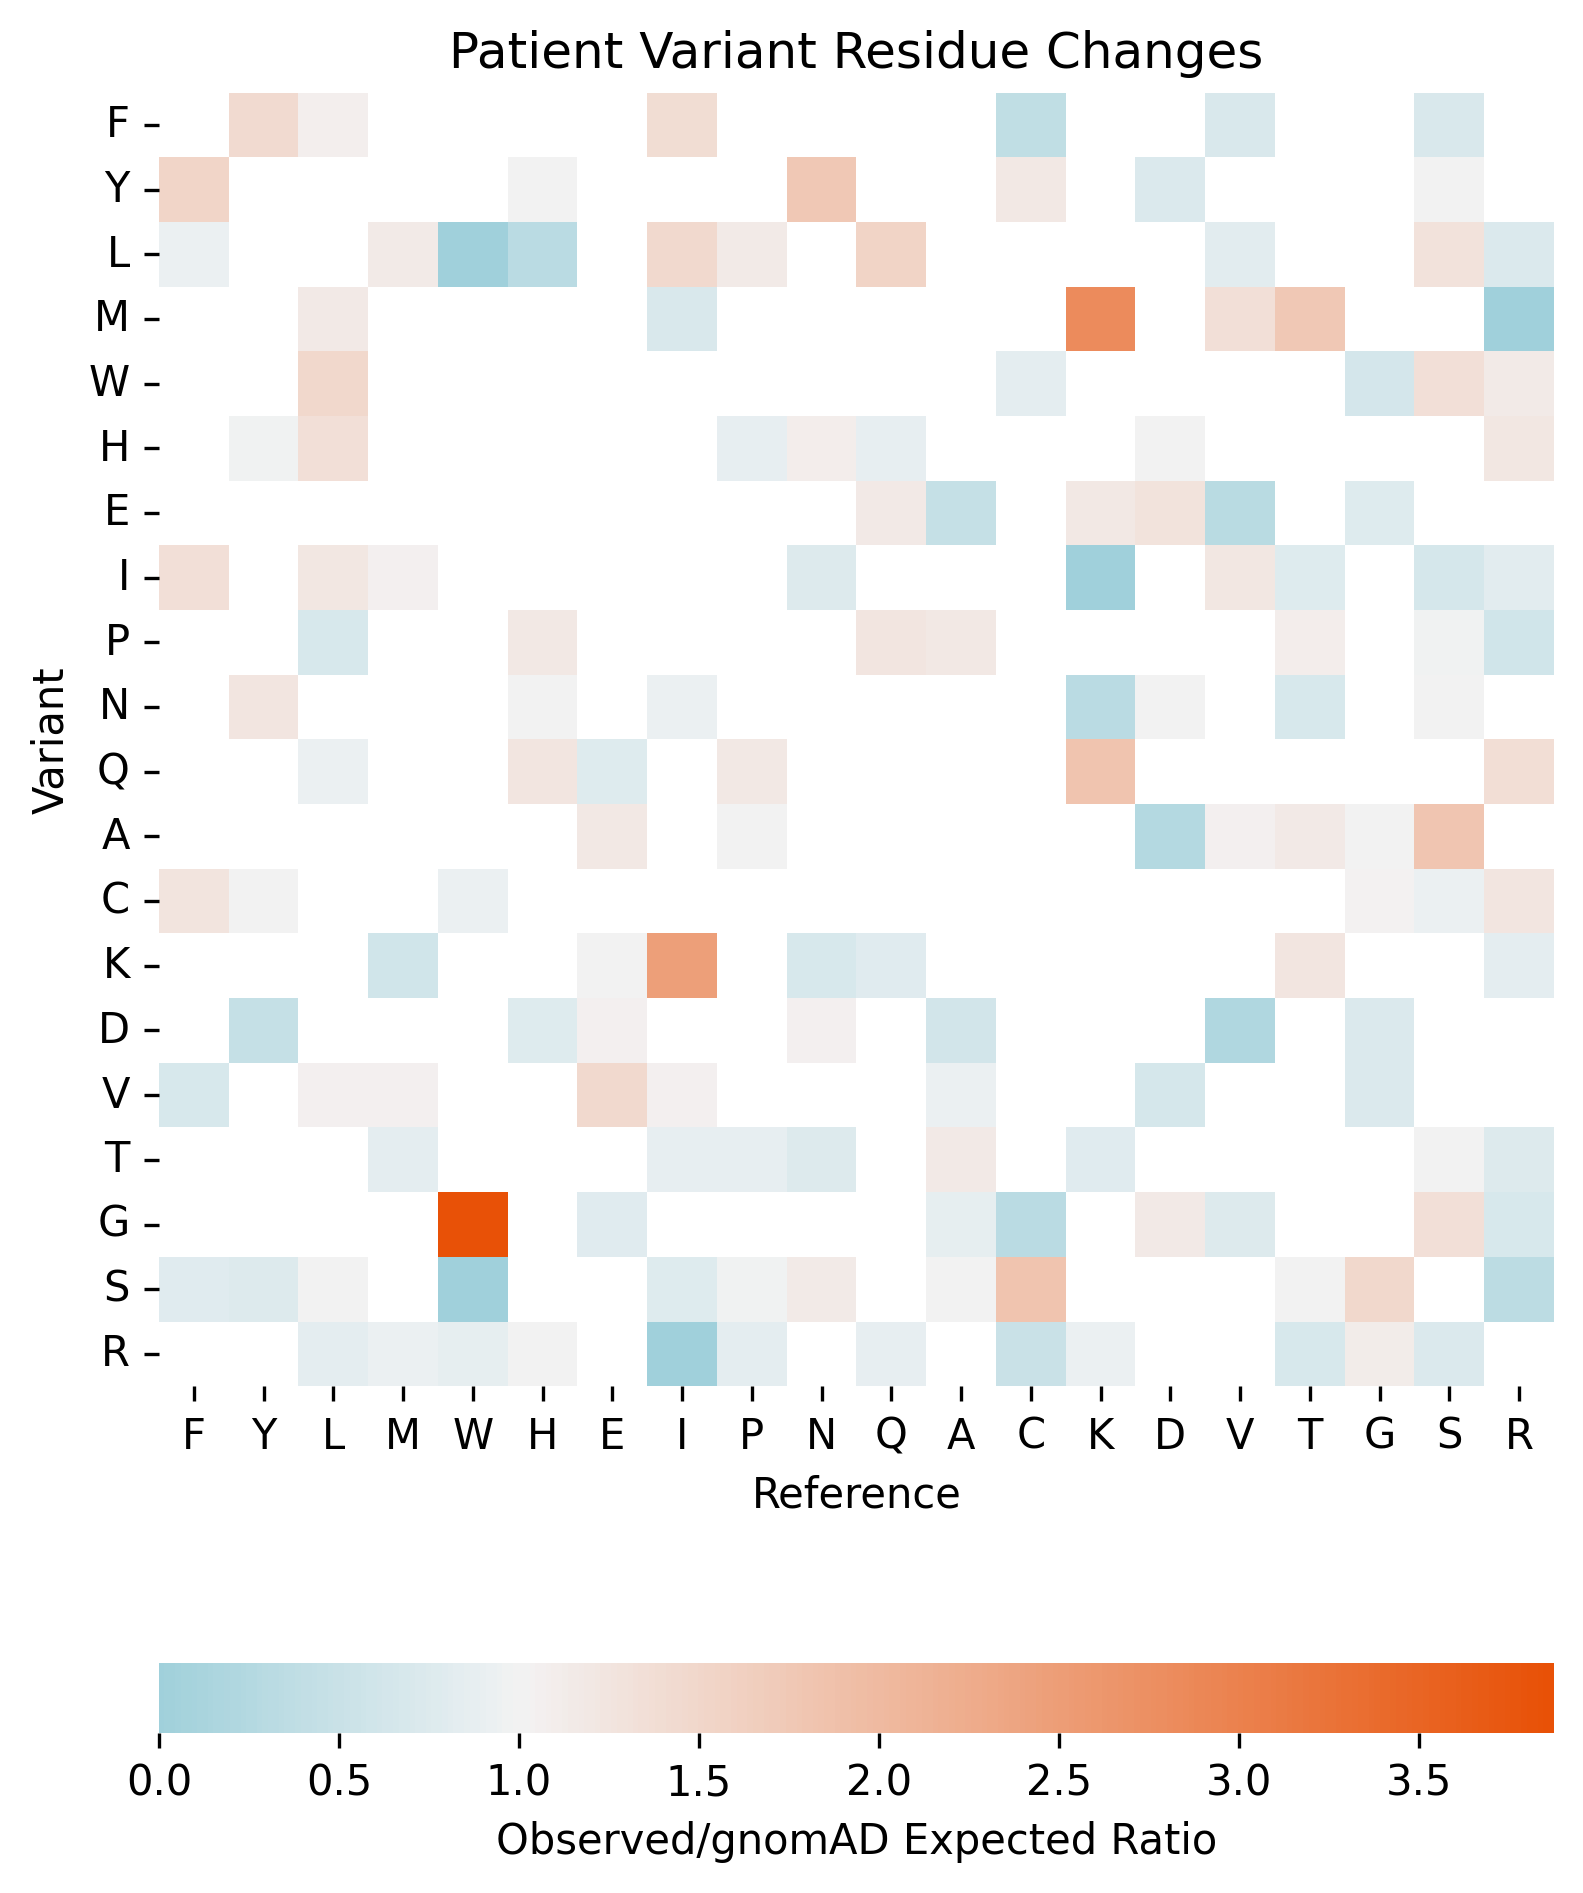

In [14]:
AA_order = chi_sq_p_vals.sort_values(by = "p_val", ascending = False)["orig_aa"]

pivot_results_df = pivot_results_df.reindex(AA_order, axis = 0)
pivot_results_df = pivot_results_df.reindex(AA_order, axis = 1)

fig, ax = plt.subplots(figsize=(6, 8), dpi = 300)

rdgn = sns.diverging_palette(h_neg=220, h_pos=20, s=99, l=55, sep=3, as_cmap=True)
sns.heatmap(pivot_results_df, ax = ax, cmap = rdgn, center = 1, cbar_kws = dict(location="bottom", label = "Observed/gnomAD Expected Ratio"))
plt.yticks(rotation = 0)

plt.title("Patient Variant Residue Changes");
plt.xlabel("Reference")
plt.ylabel("Variant");

---
Switching analysis, now focusing on what things are mutated to

In [15]:
gnomad = pd.read_csv("../output/gnomAD_residue_transition_count.csv", index_col = 0)
gnomad

,orig,var,count,paths,exp_freq,exp,obs/exp
0,A,T,254,4,0.166667,130.500000,1.946360
1,A,S,112,4,0.166667,130.500000,0.858238
2,A,P,52,4,0.166667,130.500000,0.398467
3,A,D,44,2,0.083333,65.250000,0.674330
4,A,V,226,4,0.166667,130.500000,1.731801
...,...,...,...,...,...,...,...
1,Y,D,8,2,0.166667,34.333333,0.233010
2,Y,H,46,2,0.166667,34.333333,1.339806
3,Y,F,13,2,0.166667,34.333333,0.378641
4,Y,C,107,2,0.166667,34.333333,3.116505


In [16]:
# Step 1: Group by 'var' and sum the 'count'
sum_counts = gnomad.groupby('var')['count'].transform('sum')

# # Step 2: Divide each 'count' by the sum of 'count' for its respective 'var'
gnomad['gnomad_var_exp'] = gnomad['count'] / sum_counts

# print(df)
gnomad = gnomad[["orig", "var", "gnomad_var_exp"]]
gnomad

,orig,var,gnomad_var_exp
0,A,T,0.332896
1,A,S,0.102097
2,A,P,0.125604
3,A,D,0.111959
4,A,V,0.291613
...,...,...,...
1,Y,D,0.020356
2,Y,H,0.102908
3,Y,F,0.036827
4,Y,C,0.273657


In [17]:
residue_transition_summary = pd.merge(pt_var, gnomad)
residue_transition_summary

,orig,var,count,gnomad_var_exp
0,A,T,101.0,0.332896
1,A,S,38.0,0.102097
2,A,P,21.0,0.125604
3,A,D,9.0,0.111959
4,A,V,70.0,0.291613
...,...,...,...,...
145,Y,D,1.0,0.020356
146,Y,H,12.0,0.102908
147,Y,F,5.0,0.036827
148,Y,C,29.0,0.273657


In [18]:
def return_obs_transition_to_var_freq(residue):
    var_resid = residue_transition_summary[residue_transition_summary["var"] == residue]

    return_df = var_resid#.rename(columns = {"count"})
    
    #return_df = pd.merge(return_df, expec, how = "right")

    return_df = return_df.fillna(0)
    return_df["exp"] = return_df["gnomad_var_exp"] * sum(return_df["count"])

    #display(return_df)


        
    p_val = chisquare(f_obs=return_df["count"], f_exp=return_df["exp"]).pvalue
    print(p_val)
    
    return_df["obs/exp"] = return_df["count"] / return_df["exp"]
    display(return_df[["orig", "var", "count", "exp", "obs/exp"]])


    return p_val, return_df

In [19]:
aa_codes = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

p_vals = []
results_df = []

for aa in aa_codes:
    print(aa)
    output = return_obs_transition_to_var_freq(aa)
    p_vals.append(output[0])
    results_df.append(output[1])

results_df = pd.concat(results_df)
results_df["obs/exp"] = results_df["count"] / results_df["exp"]
results_df

A
0.10202244301857438


,orig,var,count,exp,obs/exp
18,D,A,2.0,7.973333,0.250836
24,E,A,13.0,11.786667,1.102941
35,G,A,24.0,28.426667,0.844278
88,P,A,55.0,61.013333,0.901442
112,S,A,26.0,17.680000,1.470588
124,T,A,58.0,51.653333,1.122870
135,V,A,30.0,29.466667,1.018100


C
5.447453185293278e-05


,orig,var,count,exp,obs/exp
30,F,C,4.0,5.913043,0.676471
37,G,C,16.0,18.434783,0.867925
100,R,C,58.0,32.695652,1.773936
116,S,C,27.0,35.826087,0.753641
143,W,C,2.0,5.913043,0.338235
148,Y,C,29.0,37.217391,0.779206


D
0.23292802364439394


,orig,var,count,exp,obs/exp
3,A,D,9.0,11.531807,0.780450
25,E,D,41.0,31.974555,1.282270
38,G,D,28.0,34.333333,0.815534
42,H,D,3.0,3.669211,0.817614
80,N,D,20.0,15.725191,1.271845
138,V,D,1.0,3.669211,0.272538
145,Y,D,1.0,2.096692,0.476942


E
0.061930950231786325


,orig,var,count,exp,obs/exp
6,A,E,3.0,5.871720,0.510924
19,D,E,44.0,31.521866,1.395856
33,G,E,20.0,27.504373,0.727157
56,K,E,12.0,14.524781,0.826174
94,Q,E,26.0,23.486880,1.107001
133,V,E,1.0,3.090379,0.323585


F
0.23291664536355056


,orig,var,count,exp,obs/exp
11,C,F,1.0,2.742210,0.364669
53,I,F,8.0,4.736544,1.688995
67,L,F,37.0,31.909348,1.159535
115,S,F,29.0,36.895184,0.786010
137,V,F,8.0,8.475921,0.943850
147,Y,F,5.0,3.240793,1.542832


G
0.40626225839337443


,orig,var,count,exp,obs/exp
5,A,G,22.0,24.344969,0.903677
8,C,G,1.0,4.164271,0.240138
17,D,G,36.0,29.149897,1.234996
23,E,G,23.0,28.829569,0.797792
101,R,G,27.0,25.946612,1.040598
119,S,G,37.0,31.392197,1.178637
134,V,G,9.0,11.531828,0.780449
140,W,G,1.0,0.640657,1.560897


H
0.0006803171986187807


,orig,var,count,exp,obs/exp
15,D,H,17.0,17.897092,0.949875
69,L,H,5.0,5.011186,0.997768
81,N,H,12.0,12.527964,0.957857
89,P,H,21.0,27.561521,0.761932
98,Q,H,32.0,44.384787,0.720968
102,R,H,61.0,36.152125,1.687314
146,Y,H,12.0,16.465324,0.728804


I
0.29533485695048645


,orig,var,count,exp,obs/exp
26,F,I,3.0,3.659091,0.819876
58,K,I,0.0,0.304924,0.000000
68,L,I,13.0,12.196970,1.065839
78,M,I,40.0,33.541667,1.192547
82,N,I,4.0,5.183712,0.771648
110,R,I,4.0,3.049242,1.311801
122,S,I,10.0,16.465909,0.607315
127,T,I,47.0,56.410985,0.833171
136,V,I,40.0,30.187500,1.325052


K
0.14422395458648313


,orig,var,count,exp,obs/exp
20,E,K,59.0,55.037594,1.071995
49,I,K,3.0,1.223058,2.452869
75,M,K,4.0,6.115288,0.654098
85,N,K,18.0,25.989975,0.692575
93,Q,K,10.0,13.147870,0.760579
107,R,K,18.0,13.147870,1.369043
126,T,K,10.0,7.338346,1.362705


L
0.08278485438218264


,orig,var,count,exp,obs/exp
28,F,L,12.0,22.921502,0.523526
43,H,L,2.0,7.640501,0.261763
47,I,L,11.0,8.304892,1.324521
73,M,L,21.0,17.938567,1.170662
90,P,L,145.0,135.868032,1.067212
95,Q,L,14.0,10.298066,1.359479
103,R,L,18.0,16.609784,1.083699
117,S,L,41.0,36.873720,1.111903
132,V,L,28.0,34.880546,0.802740
141,W,L,0.0,0.664391,0.000000


M
0.038667734900166215


,orig,var,count,exp,obs/exp
52,I,M,10.0,18.758772,0.533084
62,K,M,3.0,1.995614,1.503297
63,L,M,11.0,13.969298,0.787441
108,R,M,0.0,1.995614,0.000000
130,T,M,28.0,19.157895,1.461538
131,V,M,39.0,35.122807,1.110390


N
0.2924163931073804


,orig,var,count,exp,obs/exp
13,D,N,46.0,37.958435,1.211852
40,H,N,8.0,7.872861,1.016149
54,I,N,5.0,5.061125,0.987923
61,K,N,2.0,8.435208,0.237101
121,S,N,37.0,36.271394,1.020088
129,T,N,13.0,16.026895,0.811137
144,Y,N,4.0,3.374083,1.185507


P
0.20916232557850736


,orig,var,count,exp,obs/exp
2,A,P,21.0,14.946860,1.404977
45,H,P,8.0,6.898551,1.159664
71,L,P,19.0,30.181159,0.629532
97,Q,P,16.0,12.647343,1.265088
104,R,P,10.0,10.060386,0.993998
113,S,P,33.0,34.780193,0.948816
125,T,P,12.0,9.485507,1.265088


Q
0.000274798189705352


,orig,var,count,exp,obs/exp
21,E,Q,17.0,30.815710,0.551667
46,H,Q,20.0,25.830816,0.774269
57,K,Q,5.0,5.891239,0.848718
72,L,Q,4.0,7.250755,0.551667
92,P,Q,19.0,23.111782,0.822092
106,R,Q,85.0,57.099698,1.488624


R
0.5079328860090548


,orig,var,count,exp,obs/exp
9,C,R,2.0,4.304721,0.464606
32,G,R,64.0,49.377682,1.296132
44,H,R,25.0,22.789700,1.096987
50,I,R,0.0,0.759657,0.000000
59,K,R,13.0,16.965665,0.766253
70,L,R,11.0,12.407725,0.886544
76,M,R,5.0,4.051502,1.234110
91,P,R,43.0,42.540773,1.010795
96,Q,R,38.0,38.236052,0.993826
120,S,R,29.0,36.716738,0.789831


S
0.1487192678092857


,orig,var,count,exp,obs/exp
1,A,S,38.0,35.733820,1.063418
7,C,S,10.0,7.338195,1.362733
31,F,S,4.0,8.614403,0.464339
36,G,S,62.0,45.943482,1.349484
55,I,S,3.0,4.147675,0.723297
66,L,S,8.0,9.571559,0.835810
83,N,S,57.0,51.048314,1.116589
87,P,S,128.0,138.787603,0.922273
99,R,S,8.0,14.995442,0.533495
123,T,S,28.0,27.119417,1.032471


T
0.21388517626710088


,orig,var,count,exp,obs/exp
0,A,T,101.0,79.895151,1.264157
51,I,T,22.0,26.422018,0.832639
60,K,T,2.0,3.774574,0.529861
77,M,T,24.0,26.422018,0.908333
84,N,T,8.0,10.694626,0.748039
86,P,T,46.0,52.844037,0.870486
109,R,T,7.0,5.976409,1.171272
111,S,T,30.0,33.971166,0.883102


V
0.2431265774185702


,orig,var,count,exp,obs/exp
4,A,V,70.0,67.654194,1.034673
16,D,V,10.0,13.470968,0.742337
22,E,V,14.0,8.980645,1.558908
27,F,V,1.0,2.394839,0.417565
34,G,V,24.0,34.126452,0.703267
48,I,V,39.0,36.221935,1.076696
64,L,V,34.0,35.623226,0.954433
74,M,V,40.0,33.527742,1.193042


W
0.25426141355698656


,orig,var,count,exp,obs/exp
12,C,W,1.0,2.375,0.421053
39,G,W,3.0,7.600,0.394737
65,L,W,4.0,4.750,0.842105
105,R,W,46.0,38.475,1.195582
118,S,W,3.0,3.800,0.789474


Y
0.723563787774264


,orig,var,count,exp,obs/exp
10,C,Y,9.0,9.241379,0.973881
14,D,Y,12.0,14.150862,0.848005
29,F,Y,2.0,2.021552,0.989339
41,H,Y,24.0,24.258621,0.989339
79,N,Y,6.0,3.176724,1.888738
114,S,Y,14.0,14.150862,0.989339


,orig,var,count,gnomad_var_exp,exp,obs/exp
18,D,A,2.0,0.038333,7.973333,0.250836
24,E,A,13.0,0.056667,11.786667,1.102941
35,G,A,24.0,0.136667,28.426667,0.844278
88,P,A,55.0,0.293333,61.013333,0.901442
112,S,A,26.0,0.085000,17.680000,1.470588
...,...,...,...,...,...,...
14,D,Y,12.0,0.211207,14.150862,0.848005
29,F,Y,2.0,0.030172,2.021552,0.989339
41,H,Y,24.0,0.362069,24.258621,0.989339
79,N,Y,6.0,0.047414,3.176724,1.888738


In [20]:
chi_sq_p_vals = pd.DataFrame({"var_aa" : aa_codes, "p_val" : p_vals})
chi_sq_p_vals

,var_aa,p_val
0,A,0.102022
1,C,0.000054
2,D,0.232928
3,E,0.061931
4,F,0.232917
5,G,0.406262
6,H,0.000680
7,I,0.295335
8,K,0.144224
9,L,0.082785


In [21]:

chi_sq_p_vals["ben_hoch"] = multitest.fdrcorrection(chi_sq_p_vals["p_val"], alpha=0.05, method='indep', is_sorted=False)[0]
chi_sq_p_vals.sort_values("p_val")

,var_aa,p_val,ben_hoch
1,C,0.000054,True
13,Q,0.000275,True
6,H,0.000680,True
10,M,0.038668,False
3,E,0.061931,False
9,L,0.082785,False
0,A,0.102022,False
8,K,0.144224,False
15,S,0.148719,False
12,P,0.209162,False


In [22]:
pivot_results_df = pd.pivot(results_df, values = "obs/exp", index = "var", columns = "orig")
pivot_results_df

orig,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
var,,,,,,,,,,,,,,,,,,,,
A,NaN,NaN,0.250836,1.102941,NaN,0.844278,NaN,NaN,NaN,NaN,NaN,NaN,0.901442,NaN,NaN,1.470588,1.122870,1.018100,NaN,NaN
C,NaN,NaN,NaN,NaN,0.676471,0.867925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.773936,0.753641,NaN,NaN,0.338235,0.779206
D,0.780450,NaN,NaN,1.282270,NaN,0.815534,0.817614,NaN,NaN,NaN,NaN,1.271845,NaN,NaN,NaN,NaN,NaN,0.272538,NaN,0.476942
E,0.510924,NaN,1.395856,NaN,NaN,0.727157,NaN,NaN,0.826174,NaN,NaN,NaN,NaN,1.107001,NaN,NaN,NaN,0.323585,NaN,NaN
F,NaN,0.364669,NaN,NaN,NaN,NaN,NaN,1.688995,NaN,1.159535,NaN,NaN,NaN,NaN,NaN,0.786010,NaN,0.943850,NaN,1.542832
G,0.903677,0.240138,1.234996,0.797792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.040598,1.178637,NaN,0.780449,1.560897,NaN
H,NaN,NaN,0.949875,NaN,NaN,NaN,NaN,NaN,NaN,0.997768,NaN,0.957857,0.761932,0.720968,1.687314,NaN,NaN,NaN,NaN,0.728804
I,NaN,NaN,NaN,NaN,0.819876,NaN,NaN,NaN,0.000000,1.065839,1.192547,0.771648,NaN,NaN,1.311801,0.607315,0.833171,1.325052,NaN,NaN
K,NaN,NaN,NaN,1.071995,NaN,NaN,NaN,2.452869,NaN,NaN,0.654098,0.692575,NaN,0.760579,1.369043,NaN,1.362705,NaN,NaN,NaN


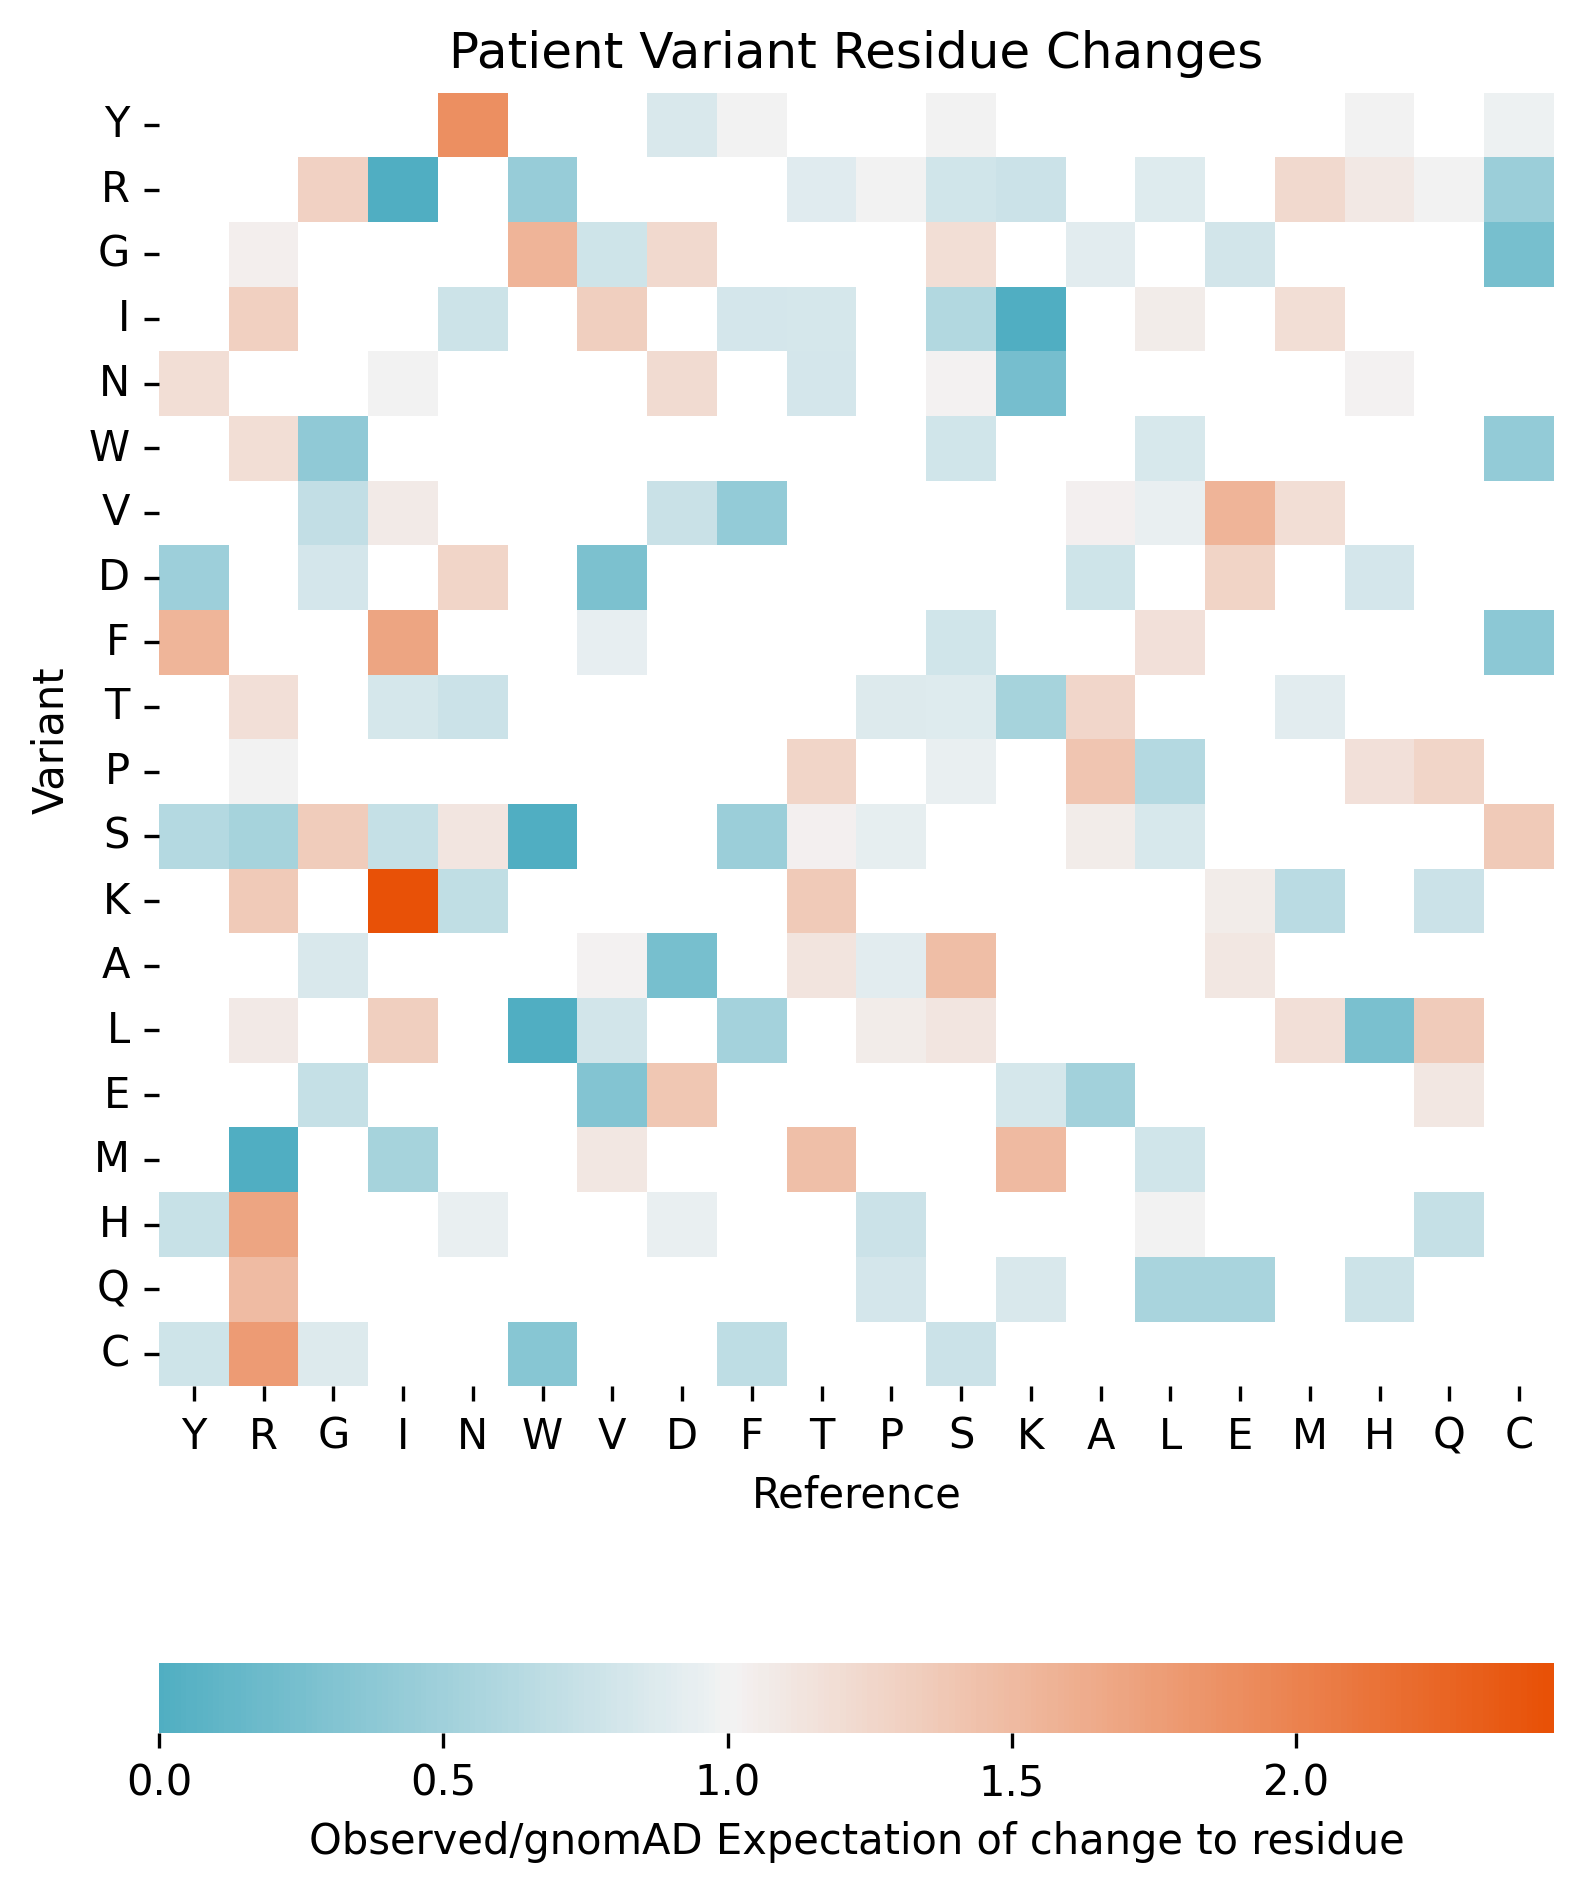

In [27]:
AA_order = chi_sq_p_vals.sort_values(by = "p_val", ascending = False)["var_aa"]

pivot_results_df = pivot_results_df.reindex(AA_order, axis = 0)
pivot_results_df = pivot_results_df.reindex(AA_order, axis = 1)

fig, ax = plt.subplots(figsize=(6, 8), dpi = 300)

rdgn = sns.diverging_palette(h_neg=220, h_pos=20, s=99, l=55, sep=3, as_cmap=True)
sns.heatmap(pivot_results_df, ax = ax, cmap = rdgn, center = 1, cbar_kws = dict(location="bottom", label = "Observed/gnomAD Expectation of change to residue"))
plt.yticks(rotation = 0)

plt.title("Patient Variant Residue Changes");
plt.xlabel("Reference")
plt.ylabel("Variant");